## 📊 Day 2 – Exploratory Data Analysis (EDA)

We’ll explore patterns in sales and profit to better understand key business insights from the Superstore data.

## ✅ Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional settings
sns.set(style="whitegrid")

## 📥 Step 2: Load the Cleaned Dataset

In [2]:
# Load the cleaned dataset
df = pd.read_csv("../data/superstore_cleaned.csv")

# Preview dataset
print(f"Shape: {df.shape}")
df.head()

Shape: (8399, 21)


,row_id,order_id,order_date,order_priority,order_quantity,sales,discount,ship_mode,profit,unit_price,...,customer_name,province,region,customer_segment,product_category,product_sub-category,product_name,product_container,product_base_margin,ship_date
0,1,3,10/13/2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2,50,293,10/1/2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
3,80,483,7/10/2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
4,85,515,8/28/2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


## 📊 Step 3: Sales & Profit by Category and Sub-Category


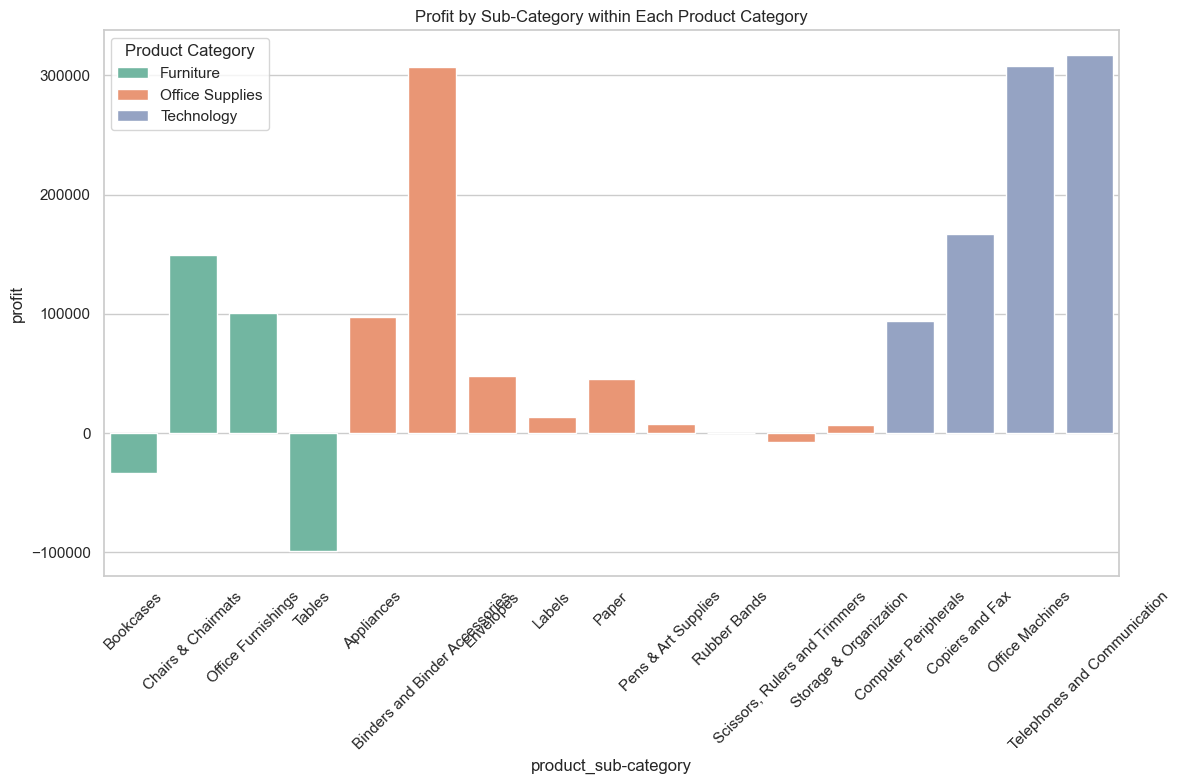

In [3]:
# Group by product category and sub-category
cat_subcat_profit = df.groupby(['product_category', 'product_sub-category'])[['sales', 'profit']].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=cat_subcat_profit, x='product_sub-category', y='profit', hue='product_category', palette='Set2')
plt.title("Profit by Sub-Category within Each Product Category")
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

## 🗺️ Step 4: Sales & Profit by Region

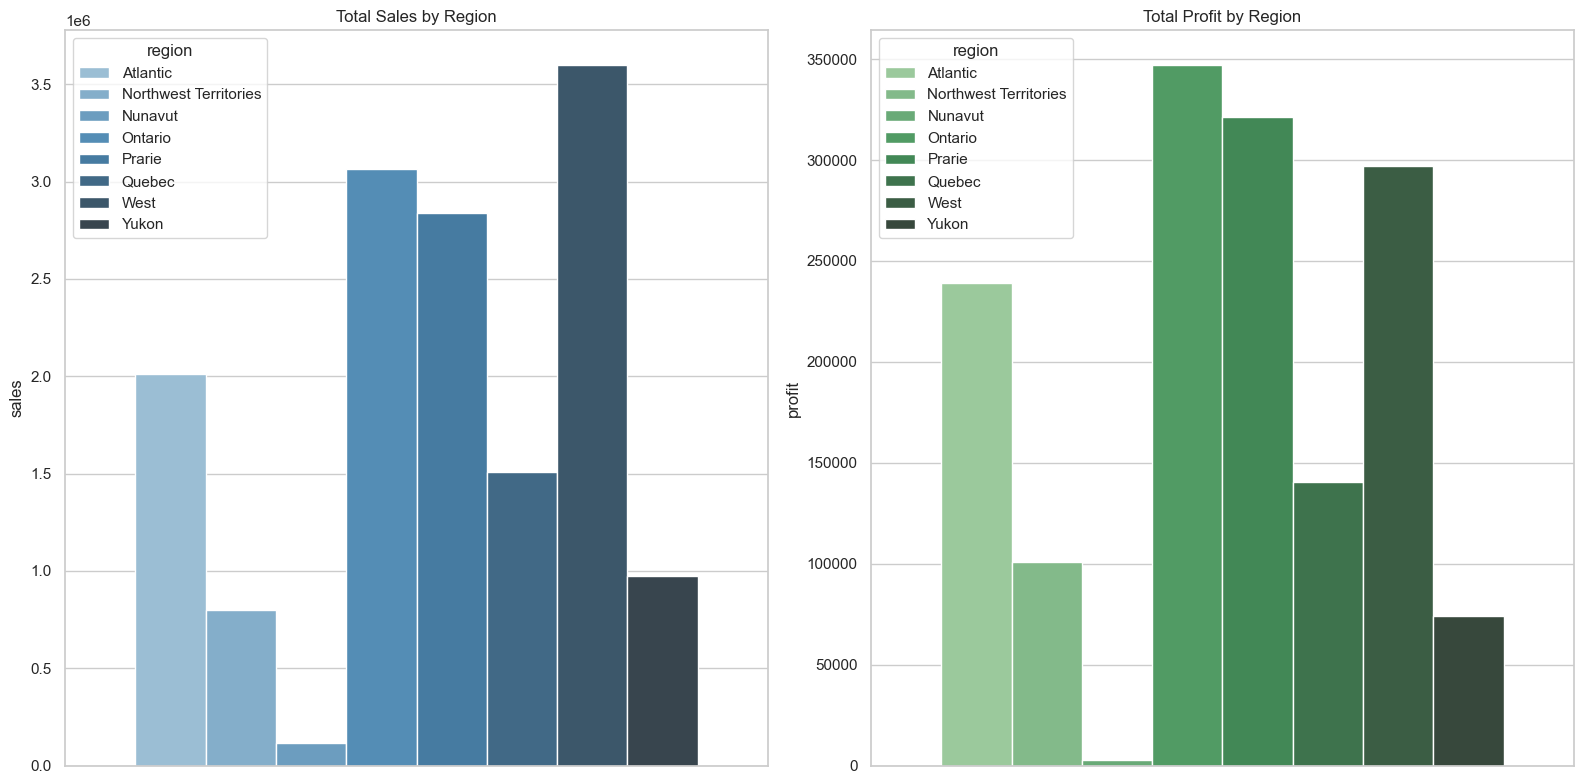

In [4]:
region_summary = df.groupby("region")[["sales", "profit"]].sum().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(data=region_summary, hue='region', y='sales', ax=ax[0], palette="Blues_d")
ax[0].set_title("Total Sales by Region")

sns.barplot(data=region_summary, hue='region', y='profit', ax=ax[1], palette="Greens_d")
ax[1].set_title("Total Profit by Region")

plt.tight_layout()
plt.show()


## 📅 Step 5: Sales Over Time

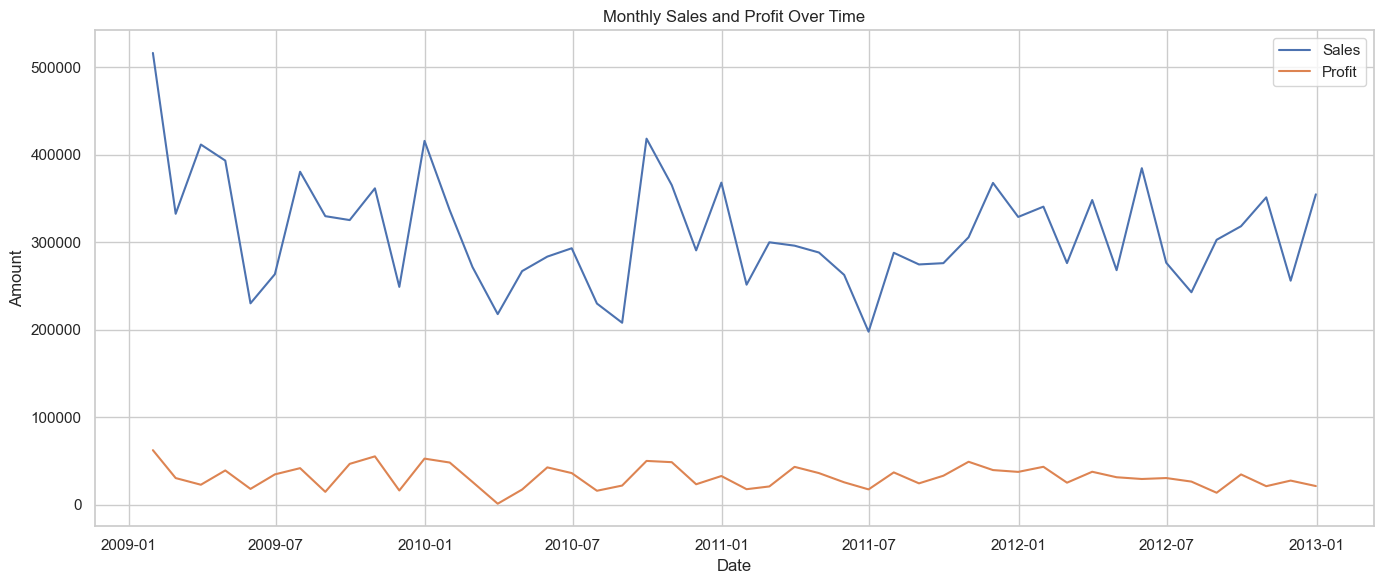

In [5]:
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.resample('ME', on='order_date')[['sales', 'profit']].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='order_date', y='sales', label='Sales')
sns.lineplot(data=monthly_sales, x='order_date', y='profit', label='Profit')
plt.title("Monthly Sales and Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()


## 🧪 Step 6: Correlation Heatmap

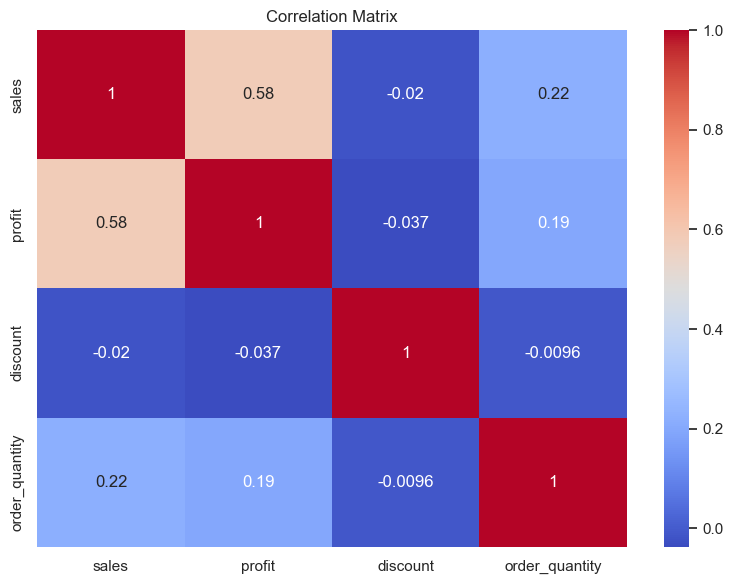

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sales', 'profit', 'discount', 'order_quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## 🌐 Step 7: Interactive Scatter Plot

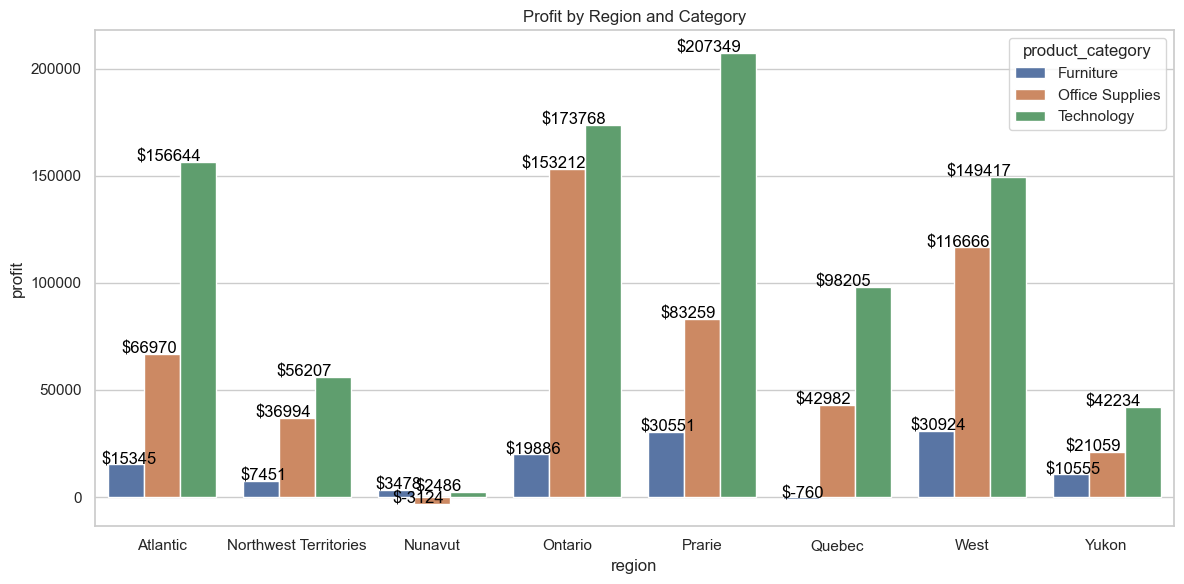

In [7]:
region_summary = df.groupby(['region', 'product_category'])[['sales', 'profit']].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Barplot: total profit
sns.barplot(data=region_summary, x='region', y='profit', hue='product_category', ax=ax)

# Scatterplot overlay (optional): simulate interactivity with markers
for i in range(region_summary.shape[0]):
    row = region_summary.iloc[i]
    ax.text(i//3 + (i%3)*0.15 - 0.25, row['profit'] + 50, f"${int(row['profit'])}", color='black', ha='center')

plt.title("Profit by Region and Category")
plt.tight_layout()
plt.show()

## ✅ Summary of Day 2
- Analyzed profit and sales by Sub-Category and Region
- Created monthly trend line plots for Sales and Profit
- Explored correlations among numeric features
- Optional interactive Plotly chart added

🚀 Ready to move to Day 3: Customer Segmentation using RFM Analysis!